In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
E=[(7.1,1.5),(5,14.6),(9.7,8.1),(14,4.6),(15.5,2.2),(18.4,6.2),(20.3,10.3)]
X = np.array(E)

X

array([[ 7.1,  1.5],
       [ 5. , 14.6],
       [ 9.7,  8.1],
       [14. ,  4.6],
       [15.5,  2.2],
       [18.4,  6.2],
       [20.3, 10.3]])

In [5]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2, linkage="single")
agg.fit_predict(X)

array([0, 1, 0, 0, 0, 0, 0])

In [7]:
agg = AgglomerativeClustering(n_clusters=3, linkage="single")
str(agg.fit_predict(X))

'[2 1 0 0 0 0 0]'

In [9]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

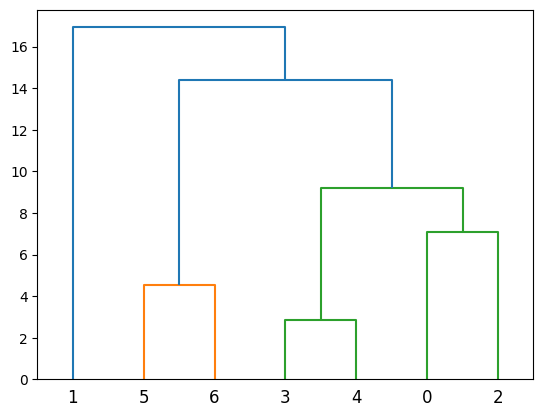

In [14]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)
plot_dendrogram(model, truncate_mode="level", p=3)
